In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

data = pd.read_csv('weather_forecast.csv')

print(data[data.isnull().any(axis=1)].head())

if 'number' in data.columns:
    del data['number']

before_rows = data.shape[0]
print(before_rows)

data = data.dropna()

after_rows = data.shape[0]
print(after_rows)

print(before_rows - after_rows)

clean_data = data.copy()

clean_data = pd.get_dummies(clean_data, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'], drop_first=True)

X = clean_data.drop(columns=['Play']).copy()
y = clean_data['Play'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

humidity_classifier.fit(X_train, y_train)

y_predicted = humidity_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted) * 100
print("Accuracy:", accuracy)


Empty DataFrame
Columns: [Outlook, Temperature, Humidity, Windy, Play]
Index: []
14
14
0
Accuracy: 20.0


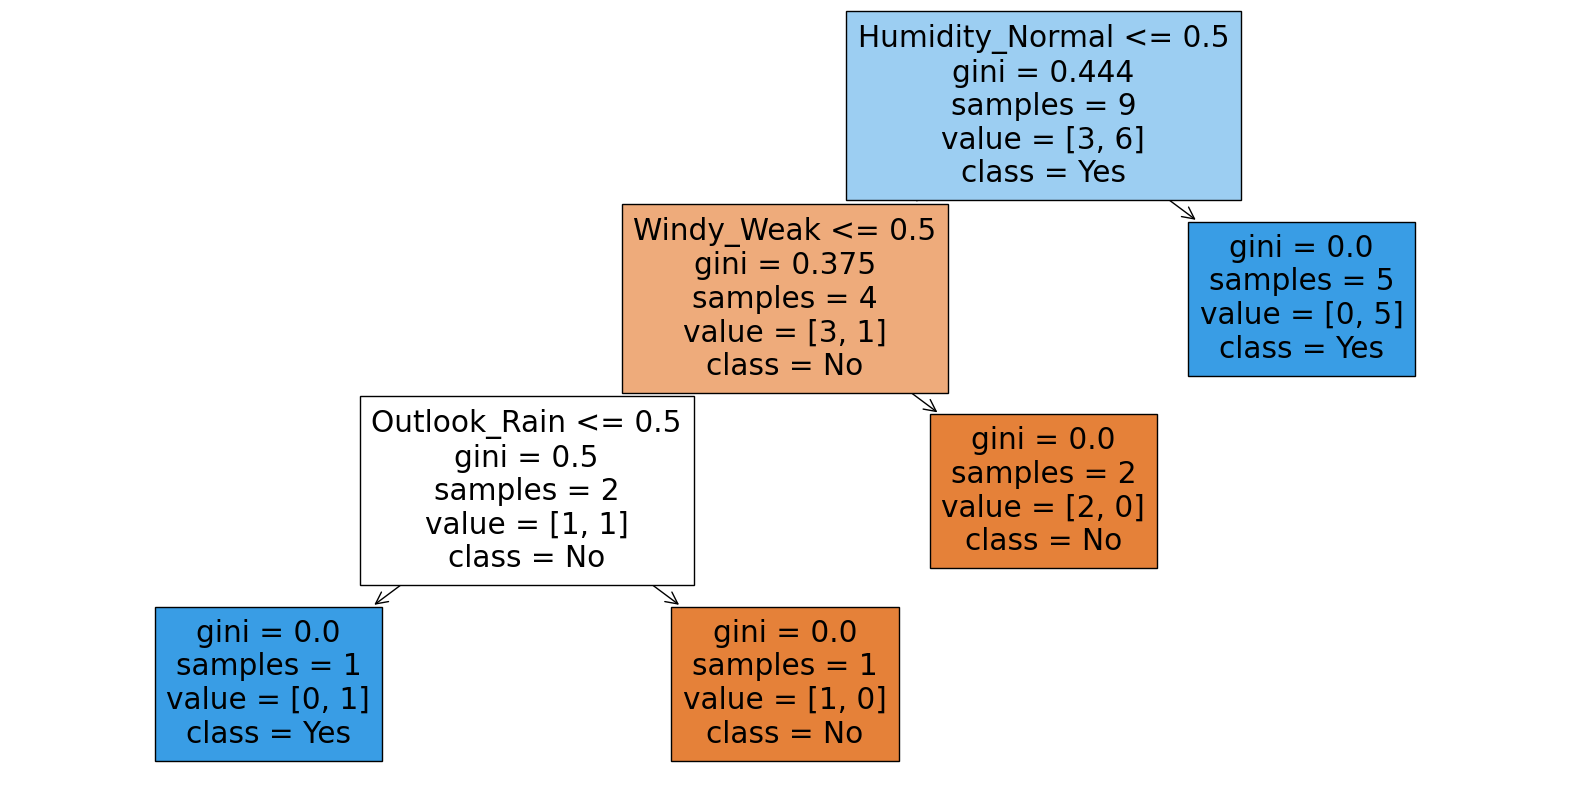

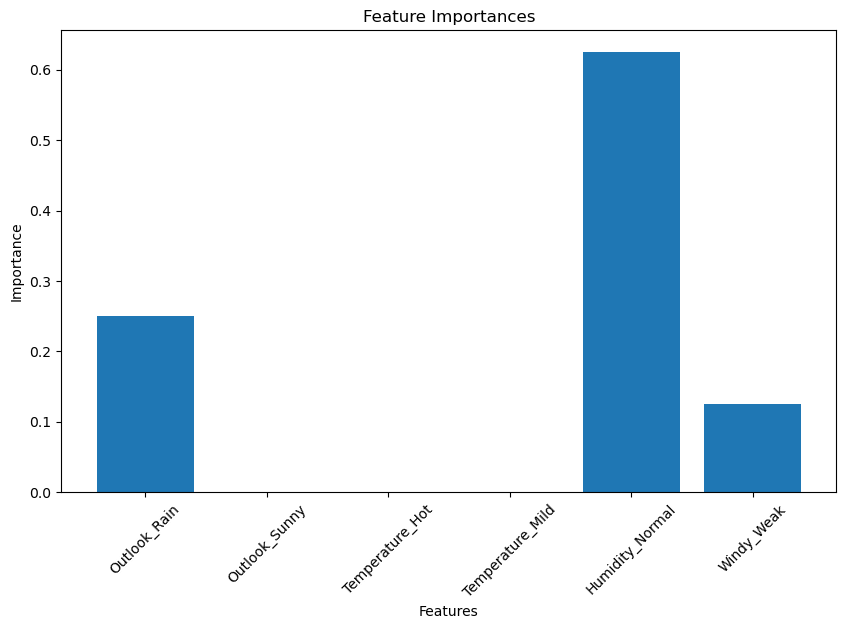

In [18]:
plt.figure(figsize=(20,10))
plot_tree(humidity_classifier, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()

feature_importances = humidity_classifier.feature_importances_
plt.figure(figsize=(10,6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()